# Challenge_ONE_Data_Science_Telecom_X_parte_2

## Preparación de los datos

### Extracción del Archivo Tratado

Se realizó la extracción. El archivo tratado es "datos_tratados.csv"

In [151]:
# Importamos librerías básicas
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

# Filtramos la advertencia específica sobre nombres de características
warnings.filterwarnings("ignore", category=UserWarning, message="X does not have valid feature names, but \w+ was fitted with feature names")

# Cargamos el archivo tratado
df_normalizado = pd.read_csv('datos_tratados.csv')
df_normalizado.head()

,ID_cliente,Abandono,Genero,Cliente_senior,Pareja,Dependientes,Duracion_contrato,Servicio_telefono,Lineas_multiples,Servicio_internet,...,Streaming_peliculas,Tipo_contrato,Factura_sin_papel,Metodo_pago,Cobro_mensual,Cobro_total,Cuentas_Diarias,Servicio_internet_bin,Cantidad_Servicios,Abandono_bin
0,0002-ORFBO,No,Femenino,0,1,1,9,1,0,DSL,...,0,Un año,1,Cheque por correo,65.6,593.30,2.186667,1,5,0
1,0003-MKNFE,No,Masculino,0,0,0,9,1,1,DSL,...,1,Mes a mes,0,Cheque por correo,59.9,542.40,1.996667,1,3,0
2,0004-TLHLJ,Sí,Masculino,0,0,0,4,1,0,Fibra óptica,...,0,Mes a mes,1,Cheque electrónico,73.9,280.85,2.463333,1,3,1
3,0011-IGKFF,Sí,Masculino,1,1,0,13,1,0,Fibra óptica,...,1,Mes a mes,1,Cheque electrónico,98.0,1237.85,3.266667,1,6,1
4,0013-EXCHZ,Sí,Femenino,1,1,0,3,1,0,Fibra óptica,...,0,Mes a mes,1,Cheque por correo,83.9,267.40,2.796667,1,4,1


In [152]:
df_normalizado.columns

Index(['ID_cliente', 'Abandono', 'Genero', 'Cliente_senior', 'Pareja',
       'Dependientes', 'Duracion_contrato', 'Servicio_telefono',
       'Lineas_multiples', 'Servicio_internet', 'Seguridad_online',
       'Backup_online', 'Proteccion_dispositivo', 'Soporte_tecnico',
       'Streaming_TV', 'Streaming_peliculas', 'Tipo_contrato',
       'Factura_sin_papel', 'Metodo_pago', 'Cobro_mensual', 'Cobro_total',
       'Cuentas_Diarias', 'Servicio_internet_bin', 'Cantidad_Servicios',
       'Abandono_bin'],
      dtype='object')

In [153]:
df_normalizado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID_cliente              7043 non-null   object 
 1   Abandono                7043 non-null   object 
 2   Genero                  7043 non-null   object 
 3   Cliente_senior          7043 non-null   int64  
 4   Pareja                  7043 non-null   int64  
 5   Dependientes            7043 non-null   int64  
 6   Duracion_contrato       7043 non-null   int64  
 7   Servicio_telefono       7043 non-null   int64  
 8   Lineas_multiples        7043 non-null   int64  
 9   Servicio_internet       7043 non-null   object 
 10  Seguridad_online        7043 non-null   int64  
 11  Backup_online           7043 non-null   int64  
 12  Proteccion_dispositivo  7043 non-null   int64  
 13  Soporte_tecnico         7043 non-null   int64  
 14  Streaming_TV            7043 non-null   

### Eliminación de Columnas Irrelevantes

Elimina columnas que no aportan valor al análisis o a los modelos predictivos, como identificadores únicos (por ejemplo, el ID del cliente). Estas columnas no ayudan en la predicción de la cancelación y pueden incluso perjudicar el desempeño de los modelos.

In [154]:
# Eliminamos ID_cliente
df_modelo = df_normalizado.drop('ID_cliente', axis=1)

# Ahora eliminamos las columnas que ya no necesitamos
df_modelo = df_modelo.drop(['Servicio_internet_bin','Abandono_bin'], axis=1)

print(df_modelo.info())
#print(df_modelo.columns)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Abandono                7043 non-null   object 
 1   Genero                  7043 non-null   object 
 2   Cliente_senior          7043 non-null   int64  
 3   Pareja                  7043 non-null   int64  
 4   Dependientes            7043 non-null   int64  
 5   Duracion_contrato       7043 non-null   int64  
 6   Servicio_telefono       7043 non-null   int64  
 7   Lineas_multiples        7043 non-null   int64  
 8   Servicio_internet       7043 non-null   object 
 9   Seguridad_online        7043 non-null   int64  
 10  Backup_online           7043 non-null   int64  
 11  Proteccion_dispositivo  7043 non-null   int64  
 12  Soporte_tecnico         7043 non-null   int64  
 13  Streaming_TV            7043 non-null   int64  
 14  Streaming_peliculas     7043 non-null   

In [155]:
# Copiamos para no modificar df_modelo original
df_clean = df_modelo.copy()

# Columnas con posibles "No internet service"
cols_to_fix = [
    'Seguridad_online', 'Backup_online', 'Proteccion_dispositivo',
    'Soporte_tecnico', 'Streaming_TV', 'Streaming_peliculas'
]

# Reemplazamos "No internet service" por "No"
for col in cols_to_fix:
    df_clean[col] = df_clean[col].replace('No internet service', 'No')

columnas_categoricas = ['Abandono', 'Genero', 'Pareja',
       'Dependientes', 'Servicio_telefono',
       'Lineas_multiples', 'Servicio_internet', 'Seguridad_online',
       'Backup_online', 'Proteccion_dispositivo', 'Soporte_tecnico',
       'Streaming_TV', 'Streaming_peliculas', 'Tipo_contrato',
       'Factura_sin_papel', 'Metodo_pago']


### Verificación de la Proporción de Cancelación (Churn)
Calcula la proporción de clientes que cancelaron en relación con los que permanecieron activos. Evalúa si existe un desbalance entre las clases, ya que esto puede impactar en los modelos predictivos y en el análisis de los resultados.

🔎 Sugerencia: Puedes usar value_counts() de pandas para obtener esta proporción: Documentación oficial de value_counts()

/tmp/ipython-input-2461811976.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.index, y=counts.values, palette='Set2')


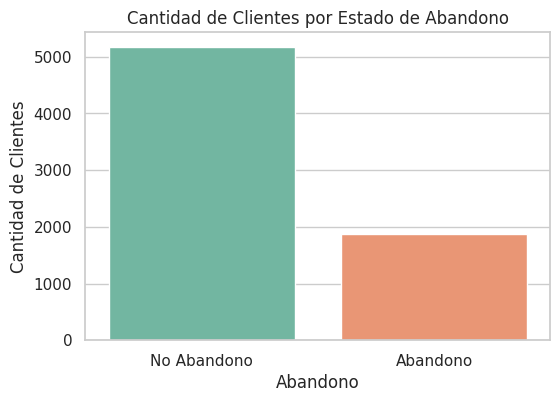

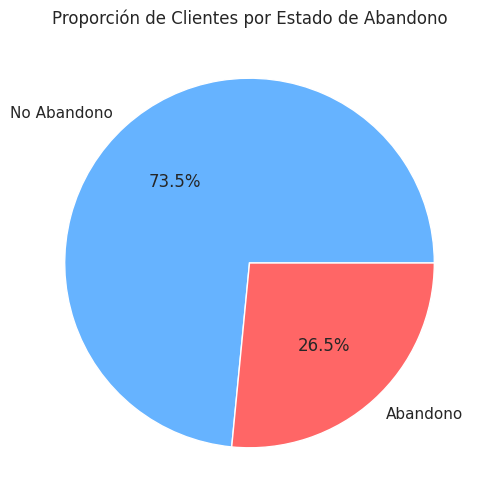

In [156]:
# Conteo de clientes según abandono
counts = df_modelo['Abandono'].value_counts().sort_index()

# Gráfico de barras
plt.figure(figsize=(6,4))
sns.barplot(x=counts.index, y=counts.values, palette='Set2')
plt.xticks([0,1], ['No Abandono', 'Abandono'])
plt.ylabel('Cantidad de Clientes')
plt.title('Cantidad de Clientes por Estado de Abandono')
plt.show()

# Gráfico de pastel
plt.figure(figsize=(6,6))
plt.pie(counts.values, labels=['No Abandono', 'Abandono'], autopct='%1.1f%%', colors=['#66b3ff','#ff6666'])
plt.title('Proporción de Clientes por Estado de Abandono')
plt.show()


### Encoding - Codificación

Transforma las variables categóricas a formato numérico para hacerlas compatibles con los algoritmos de machine learning. Utiliza un método de codificación adecuado, como one-hot encoding.

In [157]:
df_encoded = pd.get_dummies(df_clean, columns=columnas_categoricas, drop_first=True)

In [158]:
df_encoded.head()

,Cliente_senior,Duracion_contrato,Cobro_mensual,Cobro_total,Cuentas_Diarias,Cantidad_Servicios,Abandono_Sí,Genero_Masculino,Pareja_1,Dependientes_1,...,Proteccion_dispositivo_1,Soporte_tecnico_1,Streaming_TV_1,Streaming_peliculas_1,Tipo_contrato_Mes a mes,Tipo_contrato_Un año,Factura_sin_papel_1,Metodo_pago_Cheque por correo,Metodo_pago_Tarjeta de crédito (automática),Metodo_pago_Transferencia bancaria (automática)
0,0,9,65.6,593.30,2.186667,5,False,False,True,True,...,False,True,True,False,False,True,True,True,False,False
1,0,9,59.9,542.40,1.996667,3,False,True,False,False,...,False,False,False,True,True,False,False,True,False,False
2,0,4,73.9,280.85,2.463333,3,True,True,False,False,...,True,False,False,False,True,False,True,False,False,False
3,1,13,98.0,1237.85,3.266667,6,True,True,True,False,...,True,False,True,True,True,False,True,False,False,False
4,1,3,83.9,267.40,2.796667,4,True,False,True,False,...,False,True,True,False,True,False,True,True,False,False


In [159]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 26 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   Cliente_senior                                   7043 non-null   int64  
 1   Duracion_contrato                                7043 non-null   int64  
 2   Cobro_mensual                                    7043 non-null   float64
 3   Cobro_total                                      7043 non-null   float64
 4   Cuentas_Diarias                                  7043 non-null   float64
 5   Cantidad_Servicios                               7043 non-null   int64  
 6   Abandono_Sí                                      7043 non-null   bool   
 7   Genero_Masculino                                 7043 non-null   bool   
 8   Pareja_1                                         7043 non-null   bool   
 9   Dependientes_1                

In [160]:
df_encoded.isnull().sum()

,0
Cliente_senior,0
Duracion_contrato,0
Cobro_mensual,0
Cobro_total,0
Cuentas_Diarias,0
Cantidad_Servicios,0
Abandono_Sí,0
Genero_Masculino,0
Pareja_1,0
Dependientes_1,0


## Análisis de Correlación
Visualiza la matriz de correlación para identificar relaciones entre las variables numéricas. Presta especial atención a las variables que muestran una mayor correlación con la cancelación, ya que estas pueden ser fuertes candidatas para el modelo predictivo.

In [161]:
corr = df_encoded.corr()
# Mostrar la matriz de correlación
display(corr)

,Cliente_senior,Duracion_contrato,Cobro_mensual,Cobro_total,Cuentas_Diarias,Cantidad_Servicios,Abandono_Sí,Genero_Masculino,Pareja_1,Dependientes_1,...,Proteccion_dispositivo_1,Soporte_tecnico_1,Streaming_TV_1,Streaming_peliculas_1,Tipo_contrato_Mes a mes,Tipo_contrato_Un año,Factura_sin_papel_1,Metodo_pago_Cheque por correo,Metodo_pago_Tarjeta de crédito (automática),Metodo_pago_Transferencia bancaria (automática)
Cliente_senior,1.000000,0.016567,0.220173,0.102153,0.220173,0.096434,0.150889,-0.001874,0.016479,-0.211185,...,0.059428,-0.060625,0.105378,0.120176,0.138360,-0.046262,0.156530,-0.153477,-0.024135,-0.016159
Duracion_contrato,0.016567,1.000000,0.247900,0.823814,0.247900,0.443681,-0.352229,0.005106,0.379697,0.159712,...,0.360653,0.324221,0.279756,0.286111,-0.645561,0.202570,0.006152,-0.233852,0.233006,0.243510
Cobro_mensual,0.220173,0.247900,1.000000,0.650030,1.000000,0.822187,0.193356,-0.014569,0.096848,-0.113890,...,0.482692,0.338304,0.629603,0.627429,0.060165,0.004904,0.352150,-0.377437,0.030550,0.042812
Cobro_total,0.102153,0.823814,0.650030,1.000000,0.650030,0.744893,-0.199616,-0.000575,0.319327,0.065201,...,0.522779,0.432358,0.515585,0.519306,-0.446662,0.170502,0.157375,-0.293301,0.182340,0.185733
Cuentas_Diarias,0.220173,0.247900,1.000000,0.650030,1.000000,0.822187,0.193356,-0.014569,0.096848,-0.113890,...,0.482692,0.338304,0.629603,0.627429,0.060165,0.004904,0.352150,-0.377437,0.030550,0.042812
Cantidad_Servicios,0.096434,0.443681,0.822187,0.744893,0.822187,1.000000,-0.030765,-0.015722,0.182050,-0.001107,...,0.674732,0.616162,0.683960,0.686803,-0.213245,0.105886,0.225835,-0.296717,0.115389,0.104344
Abandono_Sí,0.150889,-0.352229,0.193356,-0.199616,0.193356,-0.030765,1.000000,-0.008612,-0.150448,-0.164221,...,-0.066160,-0.164674,0.063228,0.061382,0.405103,-0.177820,0.191825,-0.091683,-0.134302,-0.117937
Genero_Masculino,-0.001874,0.005106,-0.014569,-0.000575,-0.014569,-0.015722,-0.008612,1.000000,-0.001808,0.010517,...,-0.002105,-0.009212,-0.008393,-0.010487,-0.003386,0.008026,-0.011754,0.013744,0.001215,-0.016024
Pareja_1,0.016479,0.379697,0.096848,0.319327,0.096848,0.182050,-0.150448,-0.001808,1.000000,0.452676,...,0.153786,0.119999,0.124666,0.117412,-0.280865,0.082783,-0.014877,-0.095125,0.082029,0.110706
Dependientes_1,-0.211185,0.159712,-0.113890,0.065201,-0.113890,-0.001107,-0.164221,0.010517,0.452676,1.000000,...,0.013963,0.063268,-0.016558,-0.039741,-0.231720,0.068368,-0.111377,0.059071,0.060267,0.052021


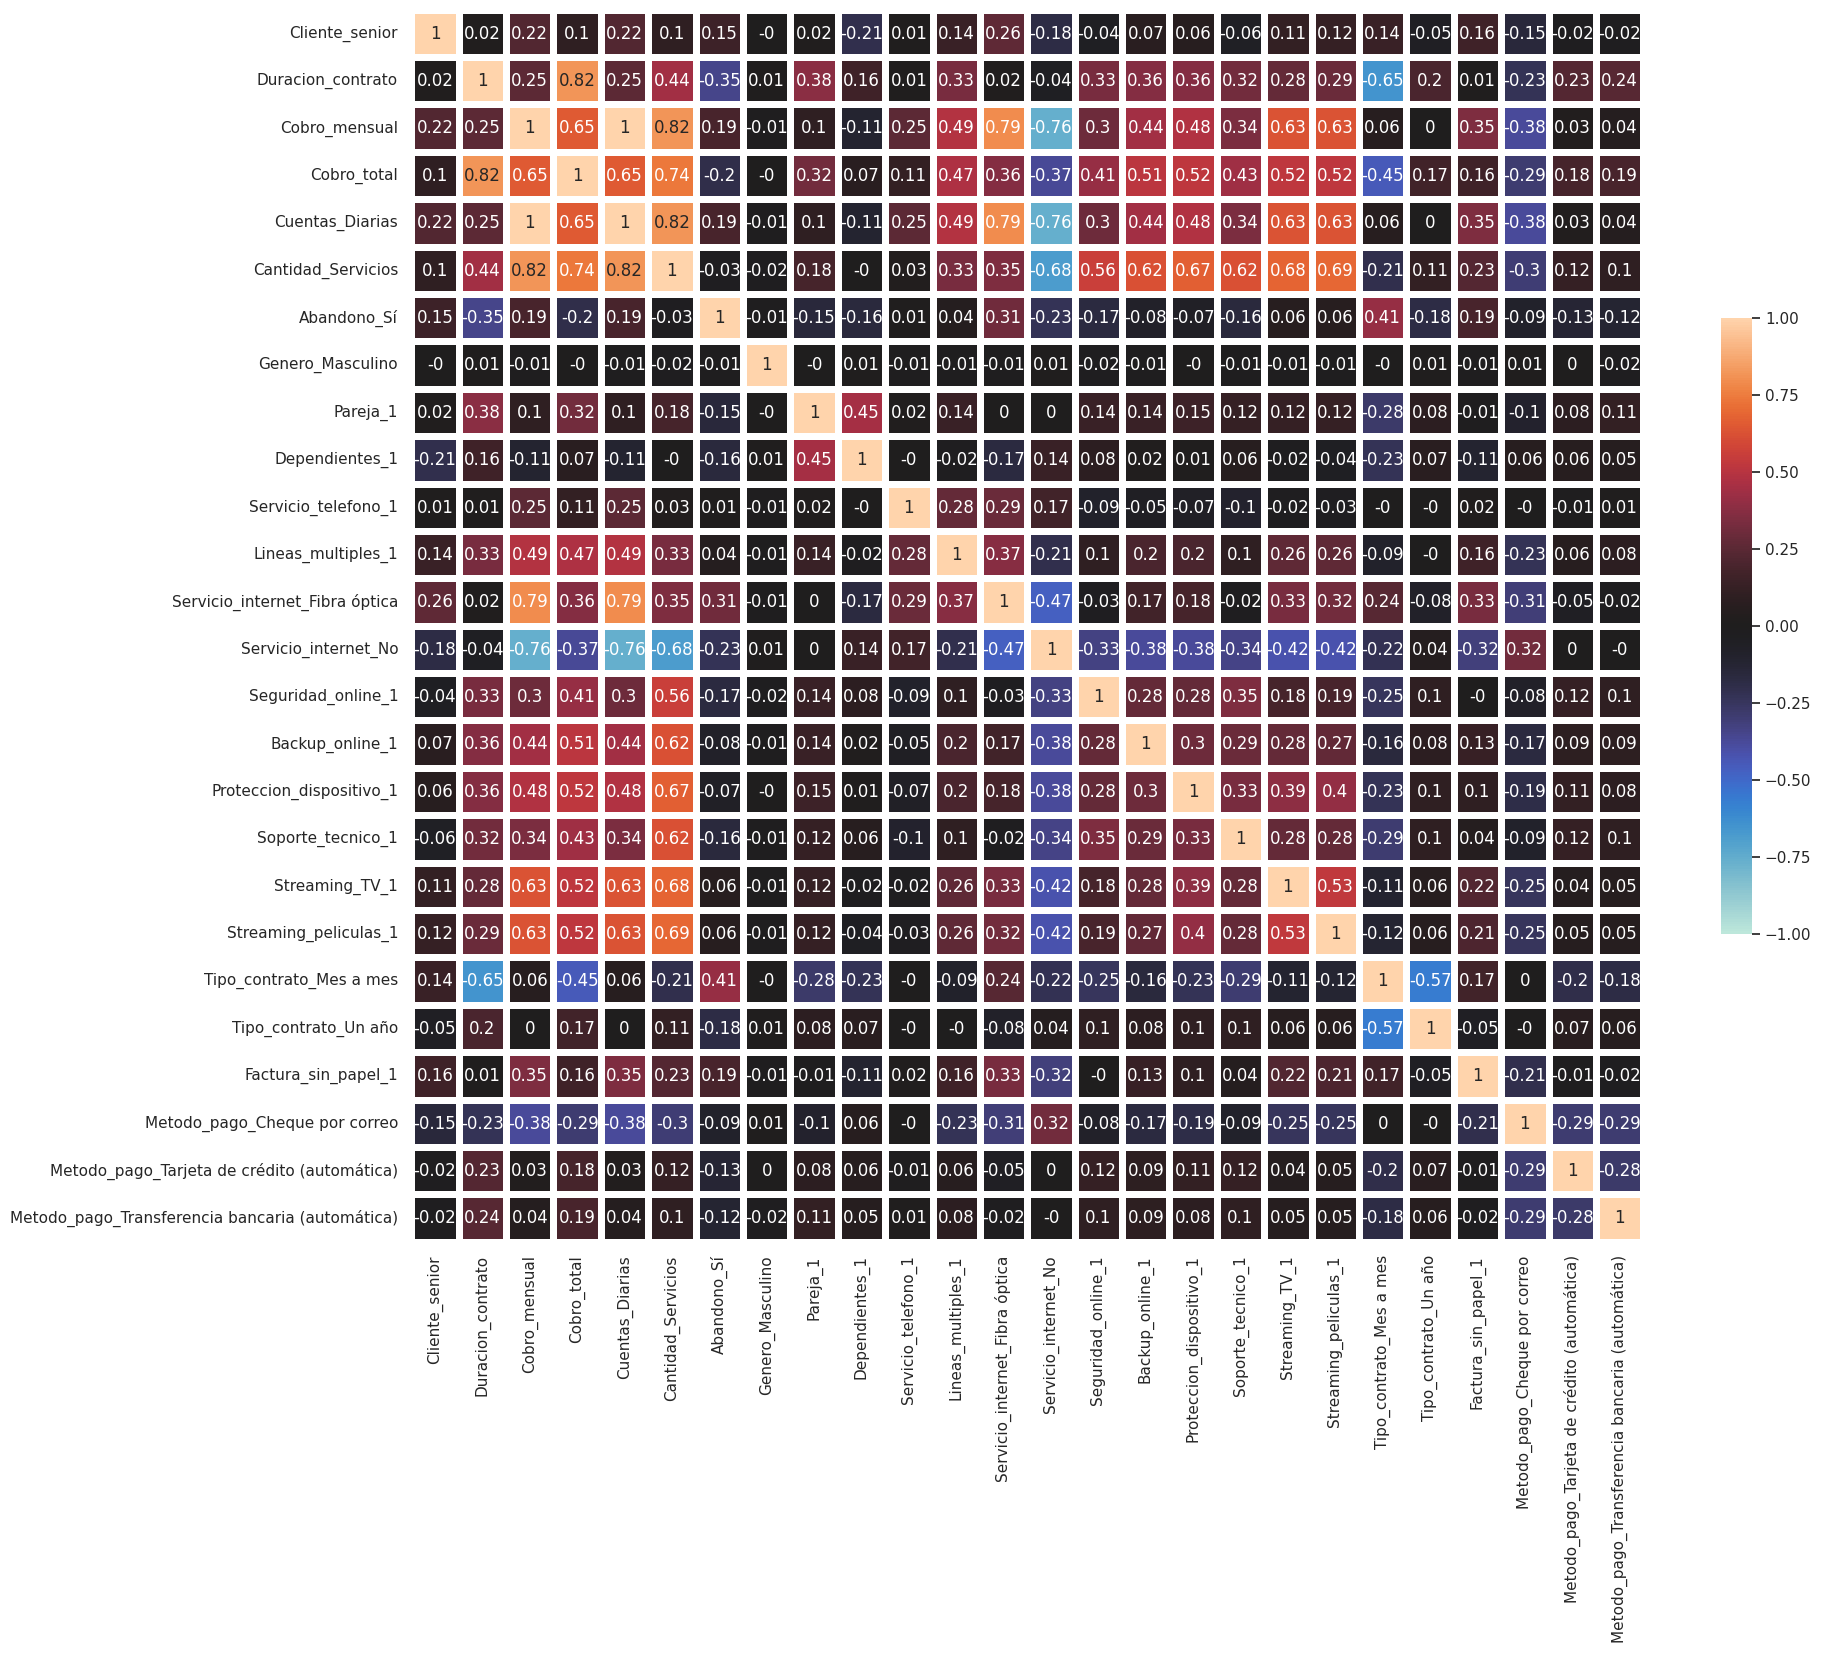

In [162]:
import numpy as np #importamos la libreria
fig, ax = plt.subplots(figsize=(20,16))
ax = sns.heatmap(np.round(corr, 2), vmax=1, vmin=-1, center=0,
                 square=True, linewidths=5, annot=True, cbar_kws={"shrink": .5})
plt.show()

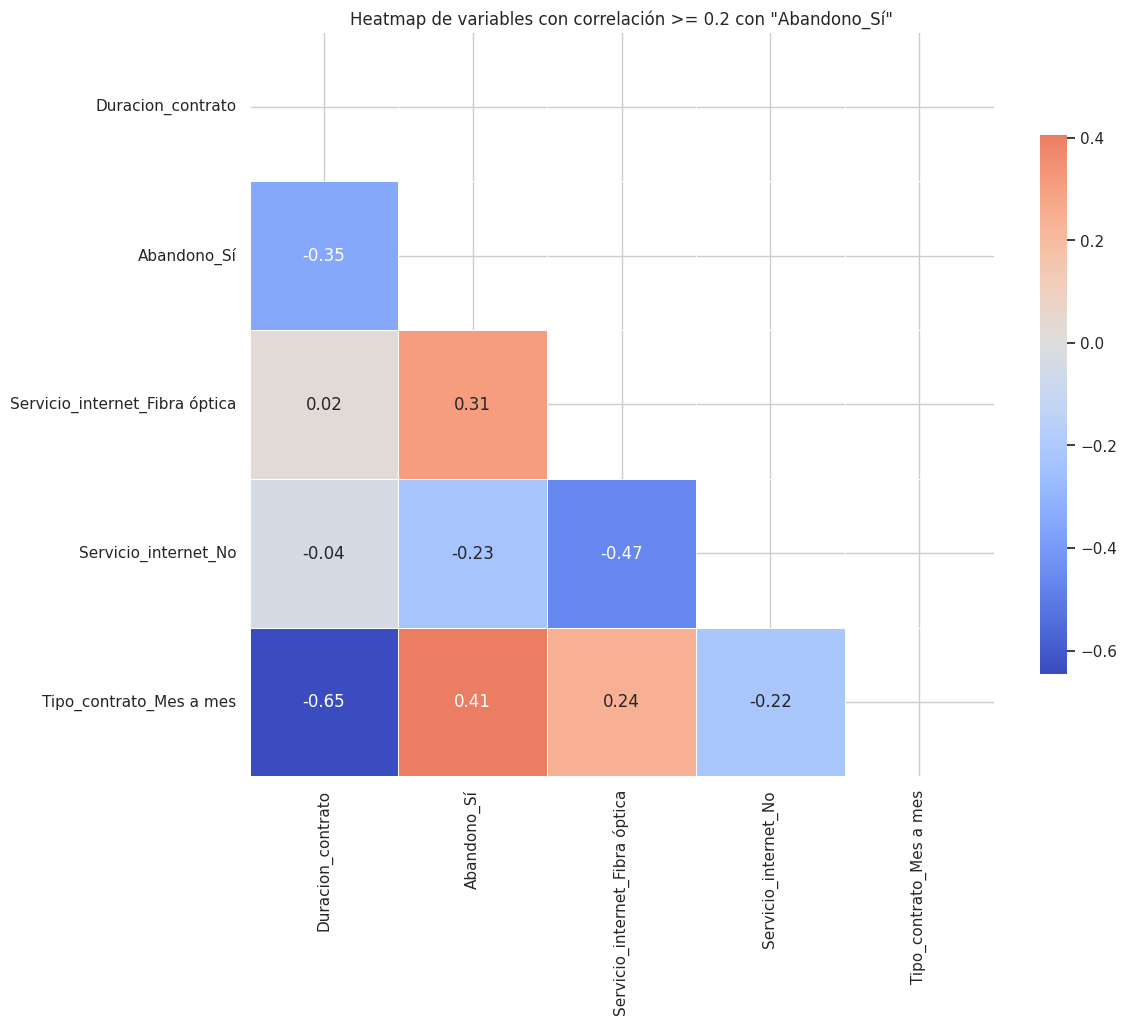

In [163]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Definimos la variable objetivo
target_var = 'Abandono_Sí'

# Definimos el umbral mínimo de correlación absoluta para selección
limiar = 0.2

# Filtramos variables que tengan correlación absoluta >= umbral con la variable objetivo
# Esto crea una lista con las variables relevantes
variables_relevantes = corr.index[abs(corr[target_var]) >= limiar].tolist()

# Aseguramos que la variable objetivo esté en la lista (si no está, añadirla)
if target_var not in variables_relevantes:
    variables_relevantes.append(target_var)

# Creamos una matriz de correlación solo con las variables seleccionadas
corr_filtrada = corr.loc[variables_relevantes, variables_relevantes]

# Generamos una máscara para ocultar el triángulo superior de la matriz (incluida la diagonal)
mascara = np.triu(np.ones_like(corr_filtrada, dtype=bool))

# Graficamos el heatmap con la máscara aplicada para mejor visualización
plt.figure(figsize=(12,10))
sns.heatmap(
    corr_filtrada,
    annot=True,
    fmt=".2f",
    cmap='coolwarm',
    center=0,
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.7},
    mask=mascara
)
plt.title(f'Heatmap de variables con correlación >= {limiar} con "{target_var}"')
plt.show()


### Análisis Dirigido

Investiga cómo variables específicas se relacionan con la cancelación, tales como:

Tiempo de contrato × Cancelación

Gasto total × Cancelación

Utiliza gráficos como boxplots o scatter plots para visualizar patrones y posibles tendencias.

/tmp/ipython-input-1463369773.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_encoded, x='Abandono_Sí', y='Duracion_contrato', palette='Set2')


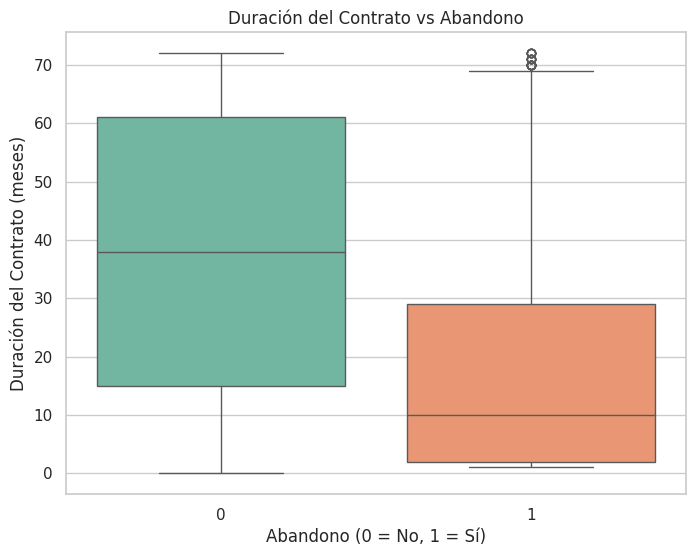

/tmp/ipython-input-1463369773.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_encoded, x='Abandono_Sí', y='Cobro_total', palette='Set1')


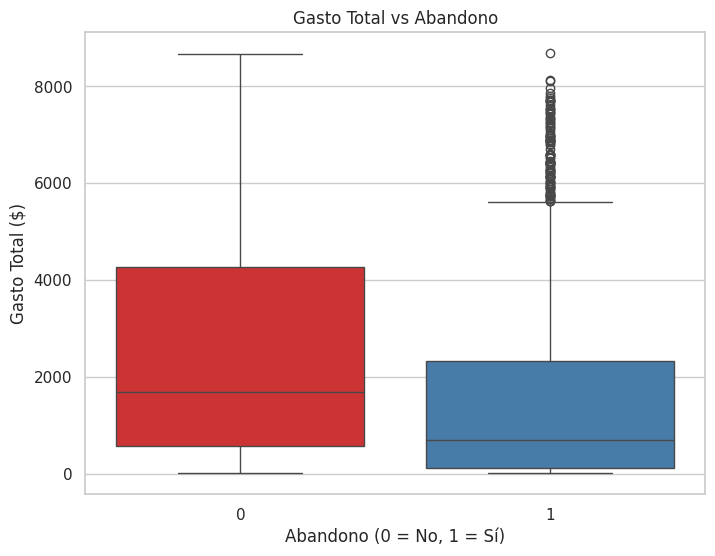

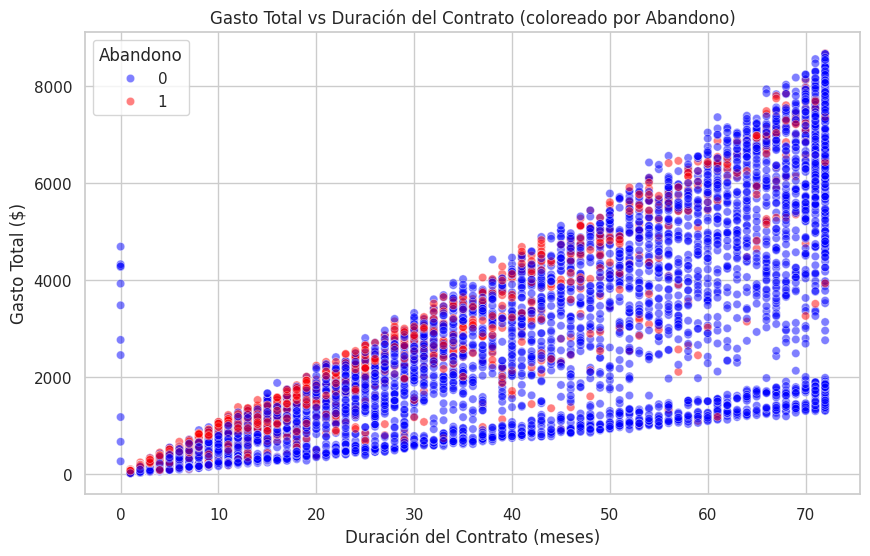

In [164]:
import numpy as np # Importar numpy para manejar inf

# Convertimos a numérico, coercing errors a NaN
df_encoded['Abandono_Sí'] = pd.to_numeric(df_encoded['Abandono_Sí'], errors='coerce')

# Rellenamos NaN y reemplazamos inf con 0
df_encoded['Abandono_Sí'] = df_encoded['Abandono_Sí'].fillna(0)
df_encoded['Abandono_Sí'] = df_encoded['Abandono_Sí'].replace([np.inf, -np.inf], 0)

# Convertimos a int
df_encoded['Abandono_Sí'] = df_encoded['Abandono_Sí'].astype(int)

# Estilo
sns.set(style="whitegrid")

# 1. Boxplot - Tiempo de contrato vs Cancelación
plt.figure(figsize=(8,6))
sns.boxplot(data=df_encoded, x='Abandono_Sí', y='Duracion_contrato', palette='Set2')
plt.title("Duración del Contrato vs Abandono")
plt.xlabel("Abandono (0 = No, 1 = Sí)")
plt.ylabel("Duración del Contrato (meses)")
plt.show()

# 2. Boxplot - Gasto total vs Cancelación
plt.figure(figsize=(8,6))
sns.boxplot(data=df_encoded, x='Abandono_Sí', y='Cobro_total', palette='Set1')
plt.title("Gasto Total vs Abandono")
plt.xlabel("Abandono (0 = No, 1 = Sí)")
plt.ylabel("Gasto Total ($)")
plt.show()

# 3. Scatterplot - Gasto total vs Duración del contrato, color por cancelación
plt.figure(figsize=(10,6))
sns.scatterplot(
    data=df_encoded,
    x='Duracion_contrato',
    y='Cobro_total',
    hue='Abandono_Sí',
    palette={0: "blue", 1: "red"},
    alpha=0.5
)
plt.title("Gasto Total vs Duración del Contrato (coloreado por Abandono)")
plt.xlabel("Duración del Contrato (meses)")
plt.ylabel("Gasto Total ($)")
plt.legend(title="Abandono")
plt.show()

## Analisis de Multicolinearidad

Usar análisis del Factor de Inflación de la Varianza (VIF):
El VIF ayuda a detectar la presencia de multicolinealidad entre variables independientes.
Generalmente, VIF > 5 o VIF > 10 indica que la variable está colineal con otras y puede ser eliminada.

In [165]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

In [166]:
X = df_encoded.drop(columns=['Abandono_Sí'])
X_const = add_constant(X)

In [167]:
# Convertimos columnas booleanas a enteros (0 o 1)
X_const = X_const.astype(float)

# Calculamos el VIF
vif_data = pd.DataFrame()
vif_data["feature"] = X_const.columns
vif_data["VIF"] = [variance_inflation_factor(X_const.values, i) for i in range(X_const.shape[1])]

# Mostramos el resultado
display(vif_data.sort_values(by='VIF', ascending=False))

/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/usr/local/lib/python3.11/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


,feature,VIF
5,Cuentas_Diarias,inf
3,Cobro_mensual,inf
6,Cantidad_Servicios,inf
19,Streaming_peliculas_1,inf
17,Soporte_tecnico_1,inf
16,Proteccion_dispositivo_1,inf
14,Seguridad_online_1,inf
15,Backup_online_1,inf
13,Servicio_internet_No,inf
10,Servicio_telefono_1,inf


### Rehacemos el VIF

In [168]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

# Copiamos X original para no modificarlo
X_filtered = X_const.copy()

#Removemos las variables con multicolinearidad perfecta (VIF = inf)
cols_to_drop = [
    "Cuentas_Diarias", "Cobro_mensual", "Cantidad_Servicios",
    "Streaming_peliculas_1", "Soporte_tecnico_1", "Proteccion_dispositivo_1",
    "Seguridad_online_1", "Backup_online_1", "Servicio_internet_No",
    "Servicio_telefono_1", "Streaming_TV_1"
]
X_filtered.drop(columns=cols_to_drop, inplace=True)

# Garantizamos que los datos estan en float para que el VIF funcione
X_filtered = X_filtered.astype(float)

# Recalculamos el VIF
vif_data = pd.DataFrame()
vif_data["feature"] = X_filtered.columns
vif_data["VIF"] = [variance_inflation_factor(X_filtered.values, i) for i in range(X_filtered.shape[1])]

# Conocemos los resultados
display(vif_data.sort_values(by="VIF", ascending=False))

,feature,VIF
0,const,23.297311
2,Duracion_contrato,5.681364
3,Cobro_total,5.181633
9,Tipo_contrato_Mes a mes,3.211259
8,Servicio_internet_Fibra óptica,1.984236
10,Tipo_contrato_Un año,1.657675
12,Metodo_pago_Cheque por correo,1.607960
13,Metodo_pago_Tarjeta de crédito (automática),1.504767
14,Metodo_pago_Transferencia bancaria (automática),1.492290
5,Pareja_1,1.461085


In [169]:
# Ejemplo: mantener solo Charges.Monthly
X_filtered.drop(columns=["Cobro_total"],inplace=True)

##VIF 2

In [170]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Recalculamos el VIF
vif_data_final = pd.DataFrame()
vif_data_final["feature"] = X_filtered.columns
vif_data_final["VIF"] = [variance_inflation_factor(X_filtered.values, i) for i in range(X_filtered.shape[1])]

# Mostramos los resultados ordenados
display(vif_data_final.sort_values(by="VIF", ascending=False))


,feature,VIF
0,const,21.981102
8,Tipo_contrato_Mes a mes,3.208432
2,Duracion_contrato,2.465810
9,Tipo_contrato_Un año,1.646001
11,Metodo_pago_Cheque por correo,1.605744
7,Servicio_internet_Fibra óptica,1.512136
12,Metodo_pago_Tarjeta de crédito (automática),1.503254
13,Metodo_pago_Transferencia bancaria (automática),1.492143
4,Pareja_1,1.459736
5,Dependientes_1,1.379765


## Modelos Predictivos

In [171]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score

### Separar Features y Target

In [172]:
X = df_encoded.drop(columns=['Abandono_Sí'])
y = df_encoded['Abandono_Sí']

### Dividir Entrenamiento y Prueba

In [173]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)


### Normalización o Estandarización (si es necesario)

Evalúa la necesidad de normalizar o estandarizar los datos, según los modelos que se aplicarán. Modelos basados en distancia, como KNN, SVM, Regresión Logística y Redes Neuronales, requieren este preprocesamiento. Por otro lado, modelos basados en árboles, como Decision Tree, Random Forest y XGBoost, no son sensibles a la escala de los datos.

🔎 Sugerencia:
Puedes leer más sobre normalización y estandarización de datos en este artículo:
Artículo en Medium sobre normalización y estandarización en Machine Learning

In [174]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Balanceo de Clases (opcional)

Si deseas profundizar en el análisis, aplica técnicas de balanceo como undersampling o oversampling. En situaciones de fuerte desbalanceo, herramientas como SMOTE pueden ser útiles para generar ejemplos sintéticos de la clase minoritaria.

🔎 Sugerencia:
Puedes leer más sobre cómo manejar el desbalanceo de clases en este artículo:
Artículo en Alura sobre desbalanceo de datos

In [175]:
smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train_scaled, y_train)

### Regresión Logística

In [176]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Iniciamos y entrenamos el modelo
lr = LogisticRegression(random_state=42)
lr.fit(X_train_bal, y_train_bal)

# Predicciones
y_pred_lr = lr.predict(X_test_scaled)
y_prob_lr = lr.predict_proba(X_test_scaled)[:, 1]

# Evaluación
print("Resultados para el modelo: Regresión Logística")
print(f"Accuracy: {accuracy_score(y_test, y_pred_lr):.2f}")
print(f"ROC AUC: {roc_auc_score(y_test, y_prob_lr):.2f}") # Incluir ROC AUC
# Precisión, Recall y F1 para la clase positiva (Abandono = 1)
print(f"Precision: {precision_score(y_test, y_pred_lr):.2f}")
print(f"Recall: {recall_score(y_test, y_pred_lr):.2f}")
print(f"F1: {f1_score(y_test, y_pred_lr):.2f}")

Resultados para el modelo: Regresión Logística
Accuracy: 0.75
ROC AUC: 0.84
Precision: 0.52
Recall: 0.79
F1: 0.62


## Random Forest

In [177]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Iniciamos y entrenamos el modelo
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_bal, y_train_bal)

# Predicciones
y_pred_rf = rf.predict(X_test_scaled)
y_prob_rf = rf.predict_proba(X_test_scaled)[:, 1]

# Evaluación
print("Resultados para el modelo: Random Forest")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.2f}")
print(f"ROC AUC: {roc_auc_score(y_test, y_prob_rf):.2f}") # Incluir ROC AUC
# Precisión, Recall y F1 para la clase positiva (Abandono = 1)
print(f"Precision: {precision_score(y_test, y_pred_rf):.2f}")
print(f"Recall: {recall_score(y_test, y_pred_rf):.2f}")
print(f"F1: {f1_score(y_test, y_pred_rf):.2f}")

Resultados para el modelo: Random Forest
Accuracy: 0.78
ROC AUC: 0.83
Precision: 0.58
Recall: 0.62
F1: 0.60


## Explorar modelos avanzados

Probar con modelos más potentes y que a menudo ofrecen mejor rendimiento en clasificación, como modelos basados en boosting (XGBoost, LightGBM).


In [178]:
#from xgboost import XGBClassifier
#from lightgbm import LGBMClassifier

# # Iniciamos y entrenamos el modelo XGBoost
#xgb = XGBClassifier(random_state=42)
#xgb.fit(X_train_bal, y_train_bal)

# Predicciones XGBoost
#y_pred_xgb = xgb.predict(X_test_scaled)
#y_prob_xgb = xgb.predict_proba(X_test_scaled)[:, 1]

In [179]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# Iniciar y entrenar el modelo XGBoost
xgb = XGBClassifier(random_state=42)
xgb.fit(X_train_bal, y_train_bal)
y_pred_xgb = xgb.predict(X_test_scaled)
y_prob_xgb = xgb.predict_proba(X_test_scaled)[:, 1]

# Predicciones XGBoost
y_pred_xgb = xgb.predict(X_test_scaled)
y_prob_xgb = xgb.predict_proba(X_test_scaled)[:, 1]

# Evaluación XGBoost
print("Resultados para el modelo: XGBoost")
print(f"Accuracy: {accuracy_score(y_test, y_pred_xgb):.2f}")
print(f"ROC AUC: {roc_auc_score(y_test, y_prob_xgb):.2f}") # Incluir ROC AUC
# Precisión, Recall y F1 para la clase positiva (Abandono = 1)
print(f"Precision: {precision_score(y_test, y_pred_xgb):.2f}")
print(f"Recall: {recall_score(y_test, y_pred_xgb):.2f}")
print(f"F1: {f1_score(y_test, y_pred_xgb):.2f}")

# Iniciar y entrenar el modelo LightGBM
lgbm = LGBMClassifier(random_state=42)
lgbm.fit(X_train_bal, y_train_bal)
y_pred_lgbm = lgbm.predict(X_test_scaled)
y_prob_lgbm = lgbm.predict_proba(X_test_scaled)[:, 1]

# Predicciones LightGBM
y_pred_lgbm = lgbm.predict(X_test_scaled)
y_prob_lgbm = lgbm.predict_proba(X_test_scaled)[:, 1]

# Evaluación LightGBM
print("\nResultados para el modelo: LightGBM")
print(f"Accuracy: {accuracy_score(y_test, y_pred_lgbm):.2f}")
print(f"ROC AUC: {roc_auc_score(y_test, y_prob_lgbm):.2f}") # Incluir ROC AUC
# Precisión, Recall y F1 para la clase positiva (Abandono = 1)
print(f"Precision: {precision_score(y_test, y_pred_lgbm):.2f}")
print(f"Recall: {recall_score(y_test, y_pred_lgbm):.2f}")
print(f"F1: {f1_score(y_test, y_pred_lgbm):.2f}")

Resultados para el modelo: XGBoost
Accuracy: 0.77
ROC AUC: 0.82
Precision: 0.57
Recall: 0.58
F1: 0.58

Resultados para el modelo: LightGBM
Accuracy: 0.78
ROC AUC: 0.83
Precision: 0.58
Recall: 0.60
F1: 0.59


### Comparación de métricas

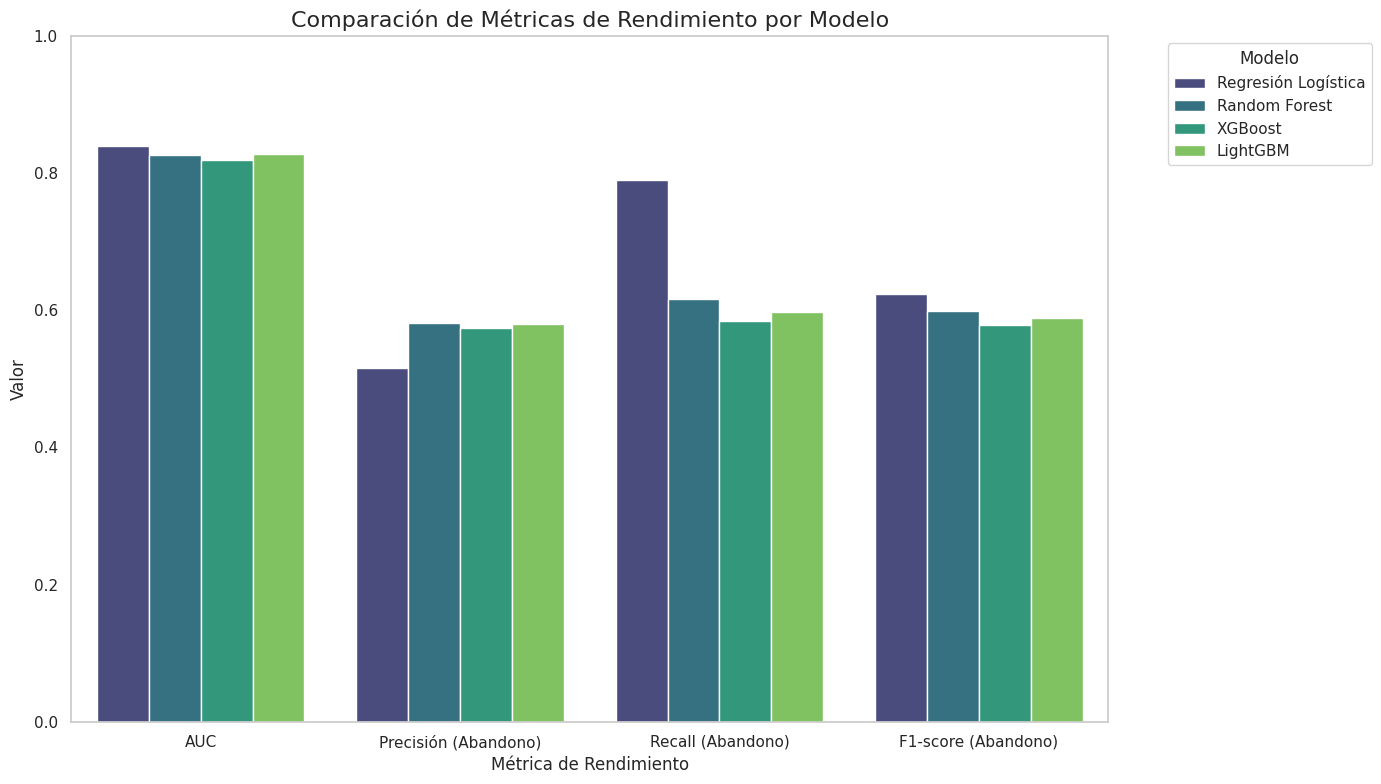

In [180]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

# Métricas de Regresión Logística
p_lr = precision_score(y_test, y_pred_lr)
r_lr = recall_score(y_test, y_pred_lr)
f1_lr = f1_score(y_test, y_pred_lr)
roc_auc_lr = roc_auc_score(y_test, y_prob_lr)

# Métricas de Random Forest
p_rf = precision_score(y_test, y_pred_rf)
r_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
roc_auc_rf = roc_auc_score(y_test, y_prob_rf)

# Métricas de XGBoost
p_xgb = precision_score(y_test, y_pred_xgb)
r_xgb = recall_score(y_test, y_pred_xgb)
f1_xgb = f1_score(y_test, y_pred_xgb)
roc_auc_xgb = roc_auc_score(y_test, y_prob_xgb)

# Métricas de LightGBM
p_lgbm = precision_score(y_test, y_pred_lgbm)
r_lgbm = recall_score(y_test, y_pred_lgbm)
f1_lgbm = f1_score(y_test, y_pred_lgbm)
roc_auc_lgbm = roc_auc_score(y_test, y_prob_lgbm)


# Creamos un DataFrame para el gráfico agrupado
data = {
    'Modelo': ['Regresión Logística', 'Regresión Logística', 'Regresión Logística', 'Regresión Logística',
               'Random Forest', 'Random Forest', 'Random Forest', 'Random Forest',
               'XGBoost', 'XGBoost', 'XGBoost', 'XGBoost',
               'LightGBM', 'LightGBM', 'LightGBM', 'LightGBM'],
    'Métrica': ['AUC', 'Precisión (Abandono)', 'Recall (Abandono)', 'F1-score (Abandono)',
                'AUC', 'Precisión (Abandono)', 'Recall (Abandono)', 'F1-score (Abandono)',
                'AUC', 'Precisión (Abandono)', 'Recall (Abandono)', 'F1-score (Abandono)',
                'AUC', 'Precisión (Abandono)', 'Recall (Abandono)', 'F1-score (Abandono)'],
    'Valor': [roc_auc_lr, p_lr, r_lr, f1_lr,
              roc_auc_rf, p_rf, r_rf, f1_rf,
              roc_auc_xgb, p_xgb, r_xgb, f1_xgb,
              roc_auc_lgbm, p_lgbm, r_lgbm, f1_lgbm]
}

df_metrics = pd.DataFrame(data)

# Graficamos
plt.figure(figsize=(14, 8))
sns.barplot(x='Métrica', y='Valor', hue='Modelo', data=df_metrics, palette='viridis')

plt.ylim([0, 1]) # Las métricas suelen estar entre 0 y 1
plt.title('Comparación de Métricas de Rendimiento por Modelo', fontsize=16)
plt.xlabel('Métrica de Rendimiento', fontsize=12)
plt.ylabel('Valor', fontsize=12)
plt.legend(title='Modelo', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y')
plt.tight_layout() # Ajustamos el diseño para evitar superposiciones
plt.show()

### Matriz de Confusión para cada Modelo

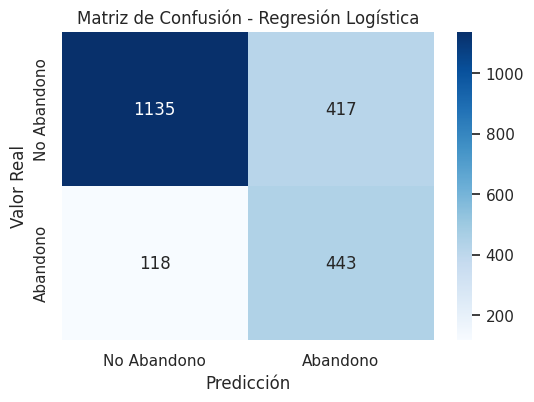

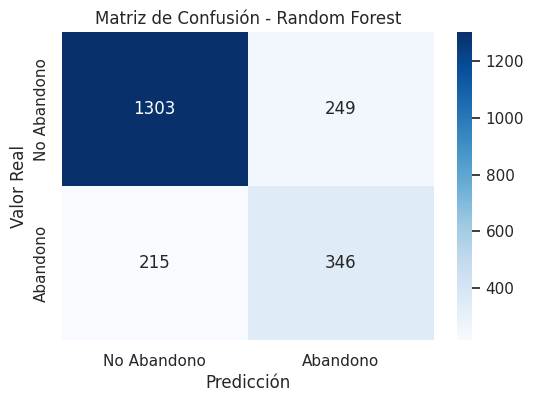

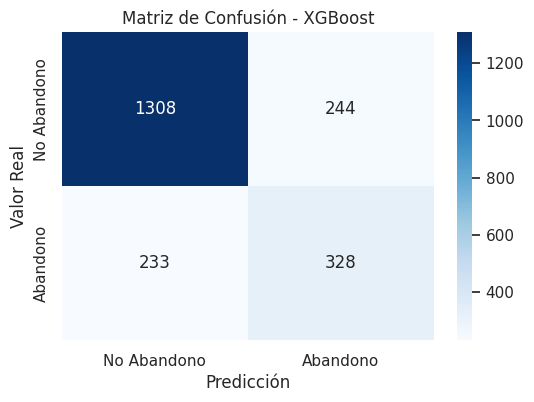

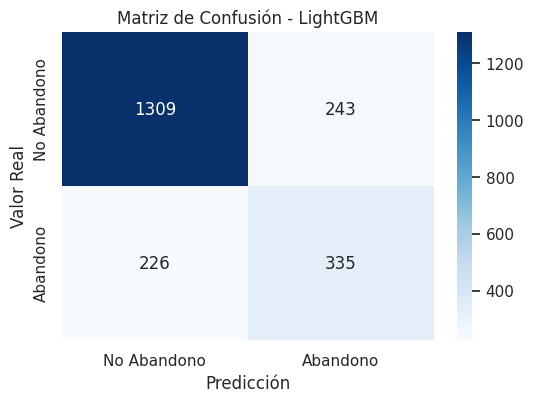

In [181]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Matriz de Confusión para Regresión Logística
cm_lr = confusion_matrix(y_test, y_pred_lr)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues', xticklabels=['No Abandono', 'Abandono'], yticklabels=['No Abandono', 'Abandono'])
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusión - Regresión Logística')
plt.show()

# Matriz de Confusión para Random Forest
cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', xticklabels=['No Abandono', 'Abandono'], yticklabels=['No Abandono', 'Abandono'])
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusión - Random Forest')
plt.show()

# Matriz de Confusión para XGBoost
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Blues', xticklabels=['No Abandono', 'Abandono'], yticklabels=['No Abandono', 'Abandono'])
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusión - XGBoost')
plt.show()

# Matriz de Confusión para LightGBM
cm_lgbm = confusion_matrix(y_test, y_pred_lgbm)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_lgbm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Abandono', 'Abandono'], yticklabels=['No Abandono', 'Abandono'])
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusión - LightGBM')
plt.show()

## Interpretación y Conclusiones

### Análisis de la Importancia de las Variables

Descripción

Editar
Después de elegir los modelos, realiza el análisis de las variables más relevantes para la predicción de la cancelación:

Regresión Logística: Investiga los coeficientes de las variables, que muestran su contribución a la predicción de cancelación.

Random Forest: Utiliza la importancia de las variables proporcionada por el modelo. Random Forest calcula la importancia basándose en cómo cada variable contribuye a la reducción de la impureza durante las divisiones de los árboles.

Otros Modelos: Dependiendo del modelo elegido, considera el análisis de métricas específicas para comprender la relevancia de las variables. Por ejemplo, coeficientes en modelos lineales, pesos en redes neuronales, o la importancia relativa en técnicas de boosting (como XGBoost).

### Importancia de Variables - Regresión Logística

Para la Regresión Logística, analizamos los coeficientes del modelo para entender la importancia de cada variable predictora en relación con la variable objetivo (abandono). Un coeficiente positivo indica que a medida que aumenta el valor de la variable, aumenta la probabilidad de abandono (manteniendo otras variables constantes). Un coeficiente negativo indica que a medida que aumenta el valor de la variable, disminuye la probabilidad de abandono. La magnitud del coeficiente refleja la fuerza de esta relación.

Coeficientes del modelo de Regresión Logística (ordenados por magnitud):


,Feature,Coefficient
1,Duracion_contrato,-1.632320
3,Cobro_total,0.853616
19,Tipo_contrato_Mes a mes,0.761687
11,Servicio_internet_Fibra óptica,0.725811
12,Servicio_internet_No,-0.593449
4,Cuentas_Diarias,-0.489460
2,Cobro_mensual,-0.489460
20,Tipo_contrato_Un año,0.346138
21,Factura_sin_papel_1,0.237487
10,Lineas_multiples_1,0.227425


/tmp/ipython-input-733084635.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Coefficient', y='Feature', data=lr_coefficients.head(top_n), palette='viridis')


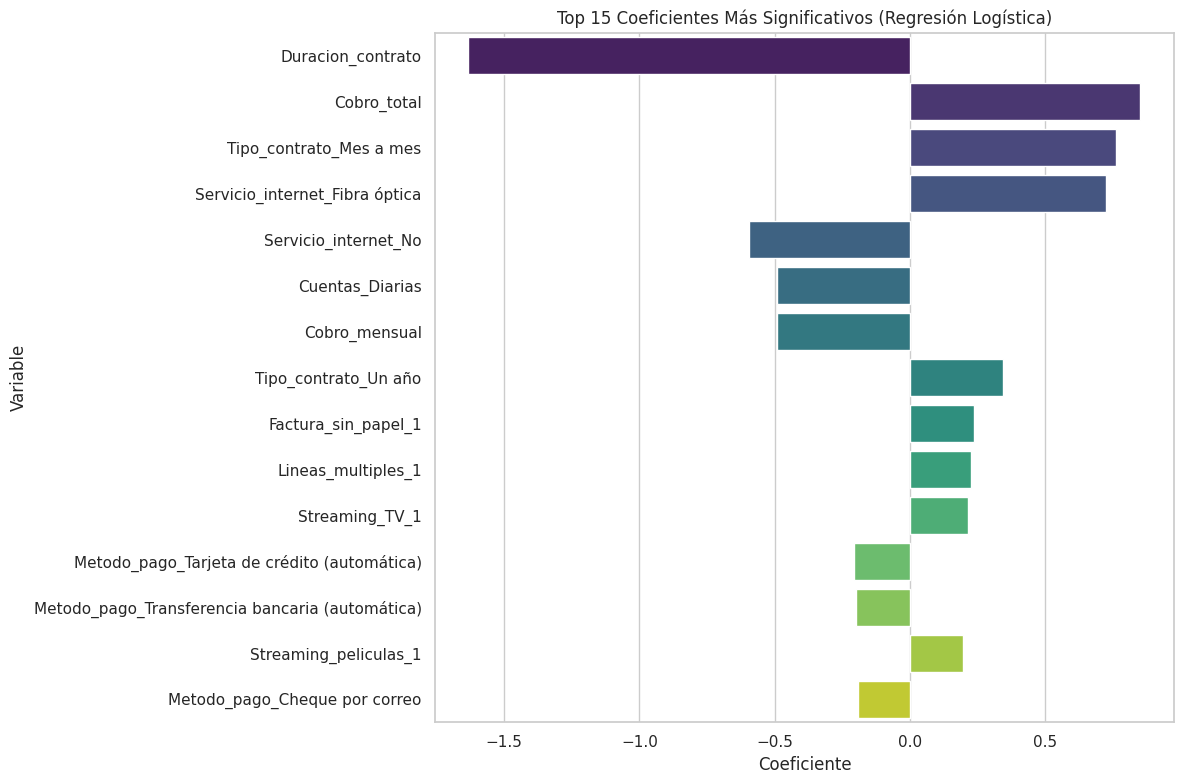

In [182]:
# Obtenemos los coeficientes del modelo de Regresión Logística
lr_coefficients = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': lr.coef_[0]
})

# Ordenamos por el valor absoluto del coeficiente para ver las variables más influyentes
lr_coefficients['Abs_Coefficient'] = abs(lr_coefficients['Coefficient'])
lr_coefficients = lr_coefficients.sort_values(by='Abs_Coefficient', ascending=False)

# Mostramos los coeficientes
print("Coeficientes del modelo de Regresión Logística (ordenados por magnitud):")
display(lr_coefficients.drop(columns='Abs_Coefficient'))

# Opcional: Graficar los coeficientes (puede ser útil si hay muchas variables)
plt.figure(figsize=(12, 8))
sns.barplot(x='Coefficient', y='Feature', data=lr_coefficients.head(top_n), palette='viridis')
plt.title(f'Top {top_n} Coeficientes Más Significativos (Regresión Logística)')
plt.xlabel('Coeficiente')
plt.ylabel('Variable')
plt.tight_layout()
plt.show()

### Importancia de Variables - Random Forest

Analizamos la importancia de las variables para el modelo Random Forest. Este modelo calcula la importancia basándose en cómo cada variable contribuye a la reducción de la impureza durante las divisiones de los árboles.

Importancia de Variables (Random Forest):


,Feature,Importance
1,Duracion_contrato,0.140912
19,Tipo_contrato_Mes a mes,0.118545
3,Cobro_total,0.118213
4,Cuentas_Diarias,0.098625
2,Cobro_mensual,0.098409
11,Servicio_internet_Fibra óptica,0.045793
5,Cantidad_Servicios,0.042769
16,Soporte_tecnico_1,0.035412
21,Factura_sin_papel_1,0.034310
13,Seguridad_online_1,0.027217


/tmp/ipython-input-2408644236.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=rf_features_df.head(top_n), palette='viridis')


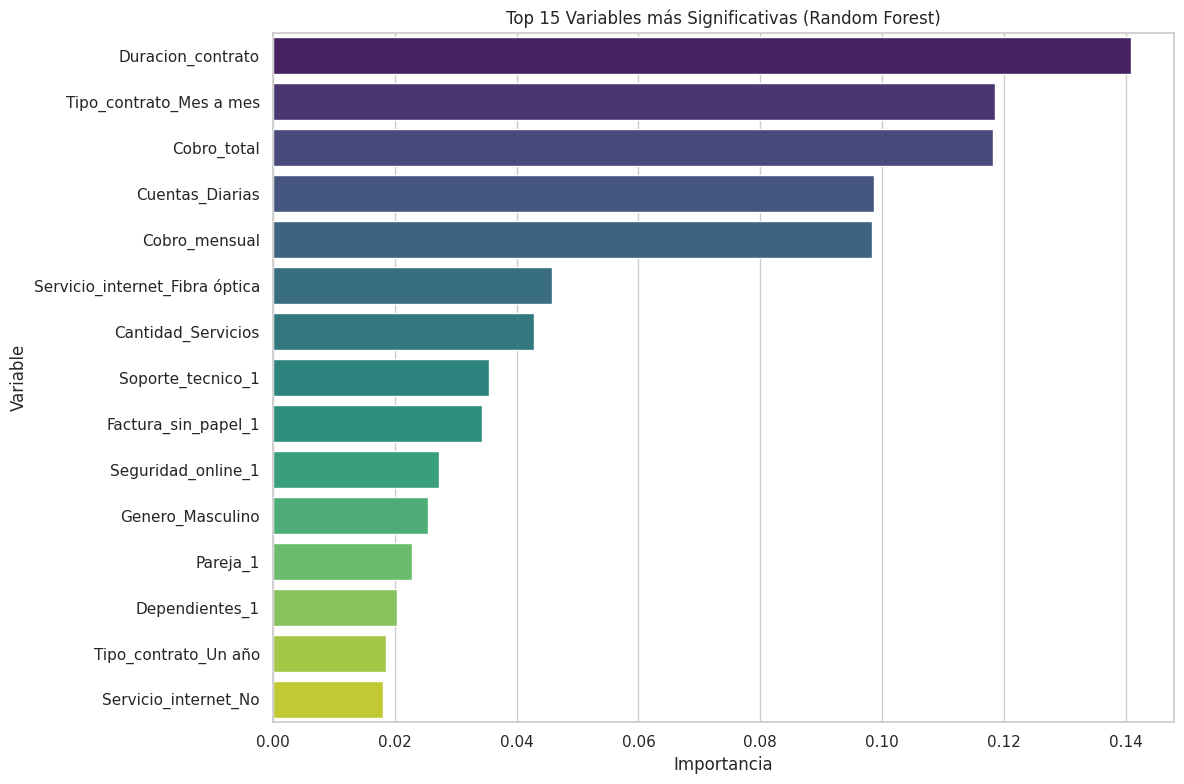

In [183]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Obtenemos la importancia de las características del modelo Random Forest
rf_feature_importances = rf.feature_importances_

# Creamos un DataFrame para visualizar la importancia de las características
rf_features_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': rf_feature_importances
})

# Ordenamos por importancia de forma descendente y seleccionamos las top N
rf_features_df = rf_features_df.sort_values(by='Importance', ascending=False)

# Mostramos los resultados
print("Importancia de Variables (Random Forest):")
display(rf_features_df.head(top_n))

# Graficamos la importancia de las características
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=rf_features_df.head(top_n), palette='viridis')
plt.title(f'Top {top_n} Variables más Significativas (Random Forest)')
plt.xlabel('Importancia')
plt.ylabel('Variable')
plt.tight_layout()
plt.show()

### Importancia de Variables - XGBoost

Analizamos la importancia de las variables para el modelo XGBoost. Similar a Random Forest y LightGBM, XGBoost proporciona una medida de la contribución de cada variable a las predicciones del modelo.

Importancia de Variables (XGBoost):


,Feature,Importance
19,Tipo_contrato_Mes a mes,0.468358
11,Servicio_internet_Fibra óptica,0.139382
12,Servicio_internet_No,0.057213
17,Streaming_TV_1,0.027457
20,Tipo_contrato_Un año,0.024007
18,Streaming_peliculas_1,0.022515
21,Factura_sin_papel_1,0.022150
16,Soporte_tecnico_1,0.020897
10,Lineas_multiples_1,0.020851
23,Metodo_pago_Tarjeta de crédito (automática),0.019439


/tmp/ipython-input-2933150879.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=xgb_features_df.head(top_n), palette='mako') # Usar otra paleta


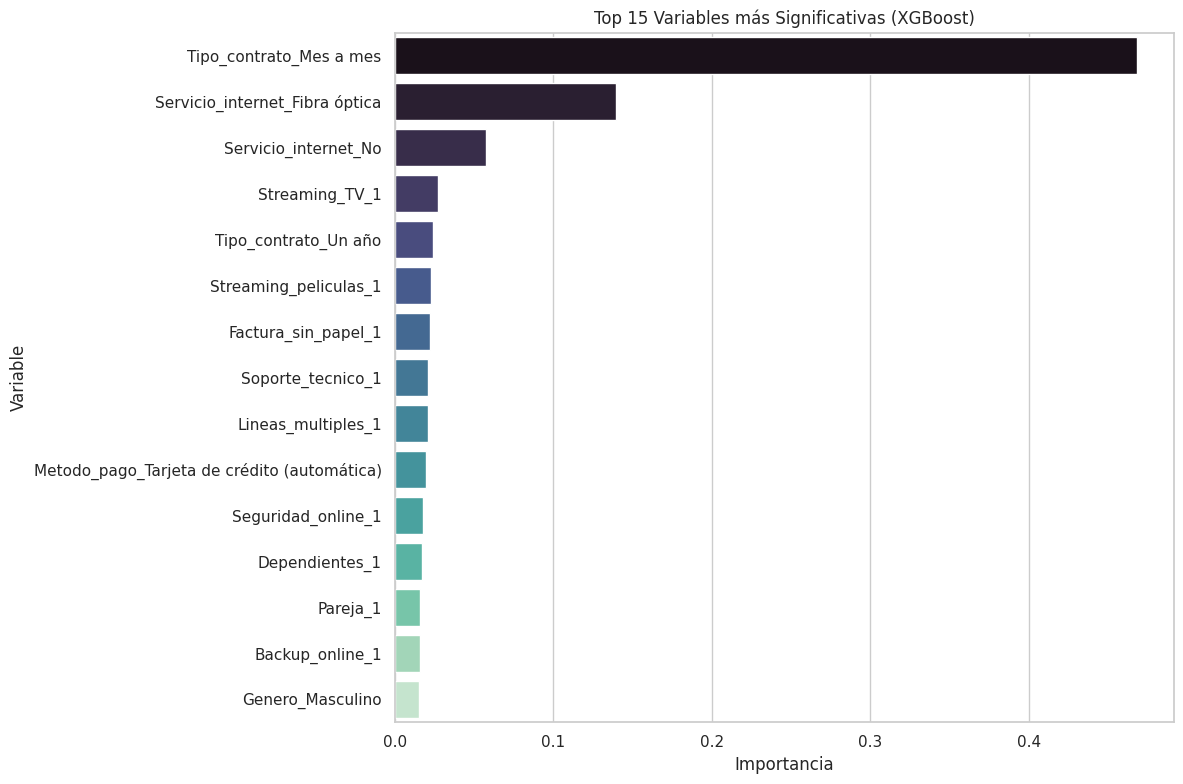

In [184]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Obtener la importancia de las características del modelo XGBoost
xgb_feature_importances = xgb.feature_importances_

# Crear un DataFrame para visualizar la importancia de las características
xgb_features_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': xgb_feature_importances
})

# Ordenar por importancia de forma descendente y seleccionar las top N
xgb_features_df = xgb_features_df.sort_values(by='Importance', ascending=False)

# Mostramos los resultados
print("Importancia de Variables (XGBoost):")
display(xgb_features_df.head(top_n))

# Graficar la importancia de las características
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=xgb_features_df.head(top_n), palette='mako') # Usar otra paleta
plt.title(f'Top {top_n} Variables más Significativas (XGBoost)')
plt.xlabel('Importancia')
plt.ylabel('Variable')
plt.tight_layout()
plt.show()

### Importancia de Variables - LightGBM

Analizamos la importancia de las variables para el modelo LightGBM. Al igual que otros modelos basados en boosting, LightGBM proporciona una medida de la influencia de cada característica en las predicciones.

Importancia de Variables (LightGBM):


,Feature,Importance
2,Cobro_mensual,568
1,Duracion_contrato,519
3,Cobro_total,408
5,Cantidad_Servicios,167
6,Genero_Masculino,151
21,Factura_sin_papel_1,109
14,Backup_online_1,84
23,Metodo_pago_Tarjeta de crédito (automática),83
13,Seguridad_online_1,77
8,Dependientes_1,73


/tmp/ipython-input-2487676854.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=lgbm_features_df.head(top_n), palette='plasma') # Usar otra paleta para diferenciar


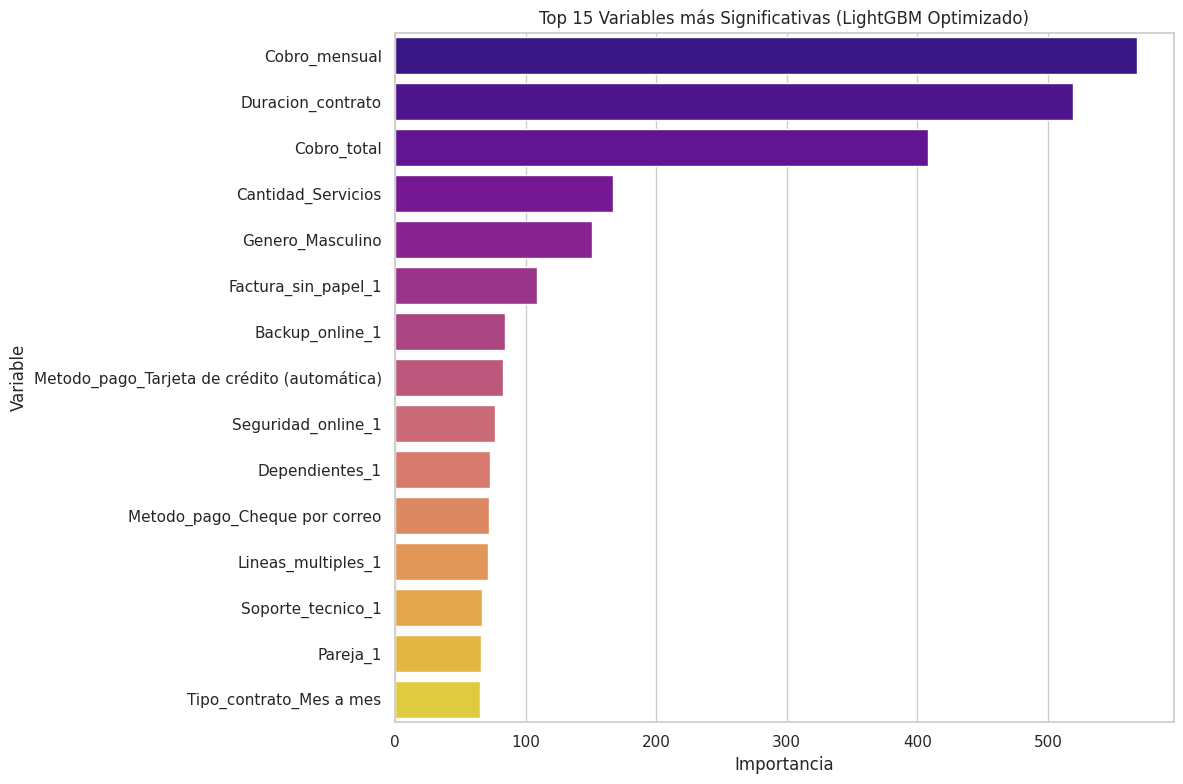

In [185]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Obtener la importancia de las características del modelo LightGBM optimizado
lgbm_feature_importances = lgbm.feature_importances_

# Crear un DataFrame para visualizar la importancia de las características
lgbm_features_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': lgbm_feature_importances
})

# Ordenar por importancia de forma descendente y seleccionar las top N
lgbm_features_df = lgbm_features_df.sort_values(by='Importance', ascending=False)

# Mostramos los resultados
print("Importancia de Variables (LightGBM):")
display(lgbm_features_df.head(top_n))

# Graficar la importancia de las características de LightGBM Optimizado
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=lgbm_features_df.head(top_n), palette='plasma') # Usar otra paleta para diferenciar
plt.title(f'Top {top_n} Variables más Significativas (LightGBM Optimizado)')
plt.xlabel('Importancia')
plt.ylabel('Variable')
plt.tight_layout()
plt.show()

## Conclusiones Detalladas e Implicaciones Estratégicas

Hemos completado un análisis exhaustivo del abandono de clientes, cubriendo la preparación de datos, análisis exploratorio, modelado predictivo y análisis de importancia de variables. Los hallazgos nos permiten identificar los principales impulsores del abandono y proponer estrategias de retención dirigidas.

**Factores Clave que Influyen en el Abandono:**

Basado en el análisis de la importancia de las variables a través de los diferentes modelos (Regresión Logística, Random Forest, XGBoost, LightGBM), los factores que consistentemente mostraron una mayor influencia en la predicción del abandono son:

*   **Duración del Contrato:** Existe una fuerte correlación negativa con el abandono. Clientes con contratos de mayor duración son significativamente menos propensos a abandonar.
*   **Tipo de Contrato (Mes a Mes):** Los clientes con contratos mes a mes tienen una probabilidad mucho mayor de abandonar en comparación con aquellos con contratos de un año o dos años.
*   **Cobro Mensual y Total:** Estas variables están relacionadas con el nivel de gasto del cliente. Si bien su interpretación puede ser compleja y correlacionada con la duración del contrato y los servicios, altos cobros mensuales pueden ser un indicador de insatisfacción o de la adquisición de servicios que no se valoran a largo plazo, especialmente en contratos cortos.
*   **Servicio de Internet (Fibra Óptica vs. No Servicio):** Los clientes con servicio de Fibra Óptica mostraron una mayor propensión al abandono en algunos modelos, mientras que no tener servicio de internet se asoció con menor abandono. Esto podría sugerir problemas con la calidad o el costo percibido del servicio de fibra óptica.
*   **Factura sin Papel:** Los clientes que optan por la factura sin papel también mostraron una mayor probabilidad de abandono en la Regresión Logística.

**Rendimiento de los Modelos:**

Evaluamos la Regresión Logística, Random Forest, XGBoost y LightGBM. Todos los modelos tuvieron un rendimiento razonable, con valores de ROC AUC por encima de 0.80.

*   La **Regresión Logística** destacó por su alto **Recall** para la clase de abandono (identificando una gran proporción de clientes que abandonaron), aunque con menor Precisión.
*   **Random Forest** y **LightGBM** mostraron un buen equilibrio entre Precisión y Recall, con un **Accuracy** ligeramente superior en esta ejecución.

La elección del modelo "Champion" dependerá de la prioridad del negocio. Si minimizar los falsos negativos (no identificar a un cliente que abandonará) es crítico, un modelo con alto Recall como la Regresión Logística podría ser preferido. Si se busca un equilibrio entre identificar abandonos y minimizar falsos positivos, Random Forest o LightGBM serían opciones fuertes.

**Estrategias de Retención Propuestas:**

Basándonos en los factores identificados, se proponen las siguientes estrategias de retención:

1.  **Incentivar Contratos a Largo Plazo:** Ofrecer descuentos significativos o beneficios adicionales (como equipos mejorados, servicios premium gratuitos por un tiempo) a los clientes que opten por contratos de uno o dos años en lugar de mes a mes.
2.  **Programas de Fidelización para Clientes Mes a Mes:** Implementar programas de engagement específicos para clientes con contrato mes a mes, monitoreando su satisfacción de cerca y ofreciendo proactivamente incentivos para quedarse o cambiar a un plan de mayor duración antes de que consideren irse.
3.  **Revisión de la Oferta y Calidad de Fibra Óptica:** Investigar las posibles causas del mayor abandono entre los usuarios de fibra óptica. Esto podría implicar mejorar la estabilidad del servicio, ajustar precios, o mejorar el soporte técnico para este segmento.
4.  **Comunicación Proactiva sobre Costos y Servicios:** Asegurarse de que los clientes comprendan completamente sus facturas y el valor de los servicios que están pagando. Ofrecer revisiones periódicas de planes para asegurar que estén en el que mejor se adapta a sus necesidades.
5.  **Optimizar la Experiencia de Facturación sin Papel:** Aunque la relación no es tan fuerte como otros factores, entender por qué los usuarios de factura sin papel abandonan más podría revelar fricciones en el proceso o falta de comunicación sobre beneficios asociados a esta opción.

Estas estrategias buscan abordar las causas fundamentales del abandono identificadas en el análisis de datos y pueden ser implementadas de forma segmentada para maximizar su impacto en la retención de clientes.

### Guardar el Modelo Champion (LightGBM)

Una vez que hemos seleccionado LightGBM como nuestro modelo Champion, procedemos a guardarlo para su uso futuro, ya sea para hacer nuevas predicciones o para un posible despliegue. Utilizaremos la librería `joblib` para serializar el modelo entrenado.

In [186]:
import joblib
import os

# Definir el nombre del archivo para guardar el modelo
champion_model_filename = 'lgbm_champion_model.pkl'

# Guardar el modelo entrenado
joblib.dump(lgbm, champion_model_filename)

print(f"El modelo Champion (LightGBM) ha sido guardado como '{champion_model_filename}'")

# Opcional: Verificar que el archivo se guardó correctamente
if os.path.exists(champion_model_filename):
    print(f"Archivo '{champion_model_filename}' encontrado.")

    # Opcional: Cargar el modelo para verificar
    loaded_model = joblib.load(champion_model_filename)
    print("Modelo cargado exitosamente.")
else:
    print(f"Error: El archivo '{champion_model_filename}' no se encontró.")

El modelo Champion (LightGBM) ha sido guardado como 'lgbm_champion_model.pkl'
Archivo 'lgbm_champion_model.pkl' encontrado.
Modelo cargado exitosamente.
